# Exploration des données d'émissions de CO2 - Canada
Ce notebook analyse les facteurs influençant les émissions de CO2 des véhicules.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

In [2]:
# Chargement des données
df = pd.read_csv('../data/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Informations générales
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   str    
 1   Model                             7385 non-null   str    
 2   Vehicle Class                     7385 non-null   str    
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   str    
 6   Fuel Type                         7385 non-null   str    
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), in

In [4]:
# Statistiques descriptives
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Distribution des émissions de CO2

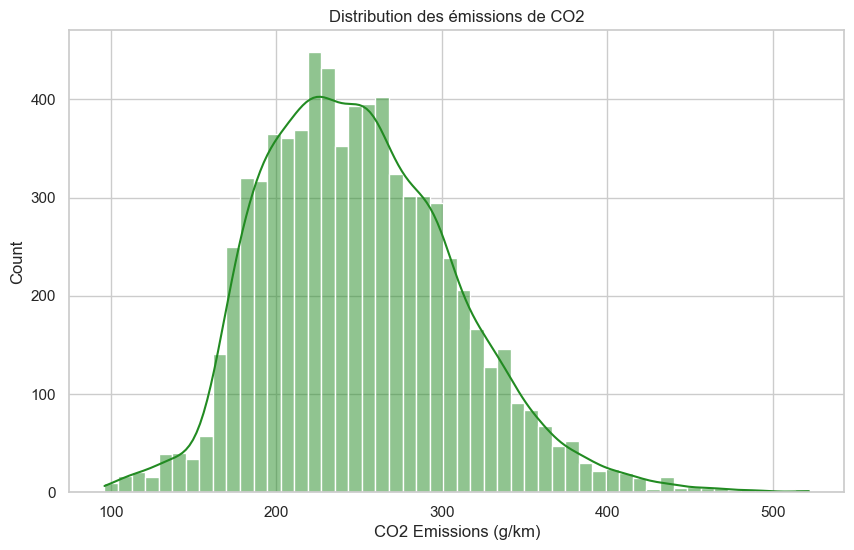

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, color='forestgreen')
plt.title('Distribution des émissions de CO2')
plt.xlabel('CO2 Emissions (g/km)')
plt.show()

## Relation entre Taille du Moteur et CO2

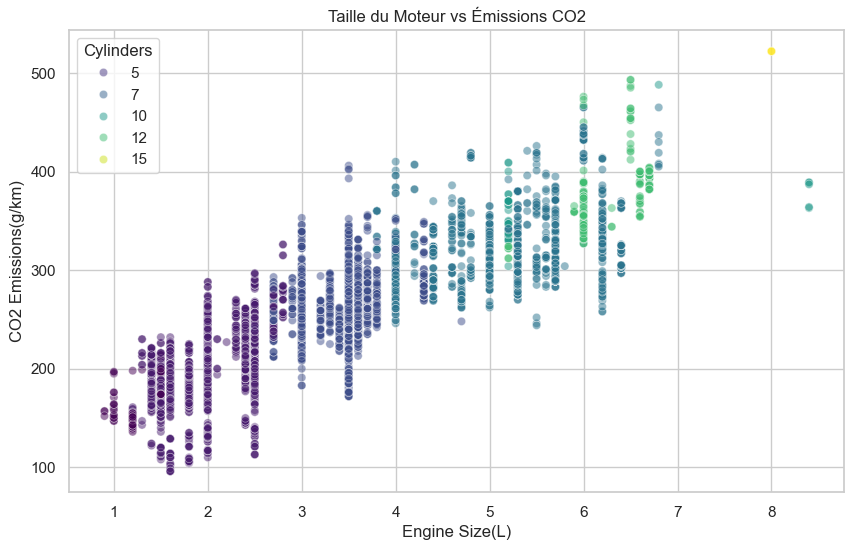

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, alpha=0.5, hue='Cylinders', palette='viridis')
plt.title('Taille du Moteur vs Émissions CO2')
plt.show()

## Émissions moyennes par classe de véhicule

C:\Users\handy\AppData\Local\Temp\ipykernel_16316\2402969708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CO2 Emissions(g/km)', y='Vehicle Class', data=df, order=order, palette='magma')


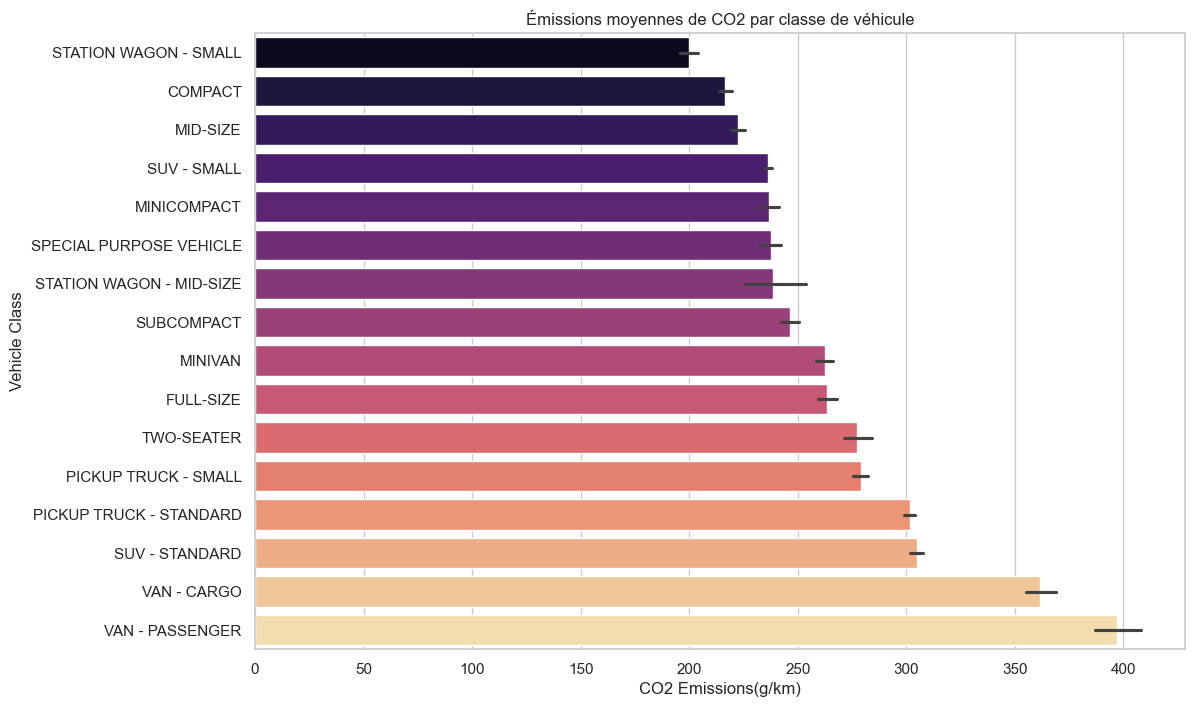

In [7]:
plt.figure(figsize=(12, 8))
order = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values().index
sns.barplot(x='CO2 Emissions(g/km)', y='Vehicle Class', data=df, order=order, palette='magma')
plt.title('Émissions moyennes de CO2 par classe de véhicule')
plt.show()

## Corrélation entre les variables numériques

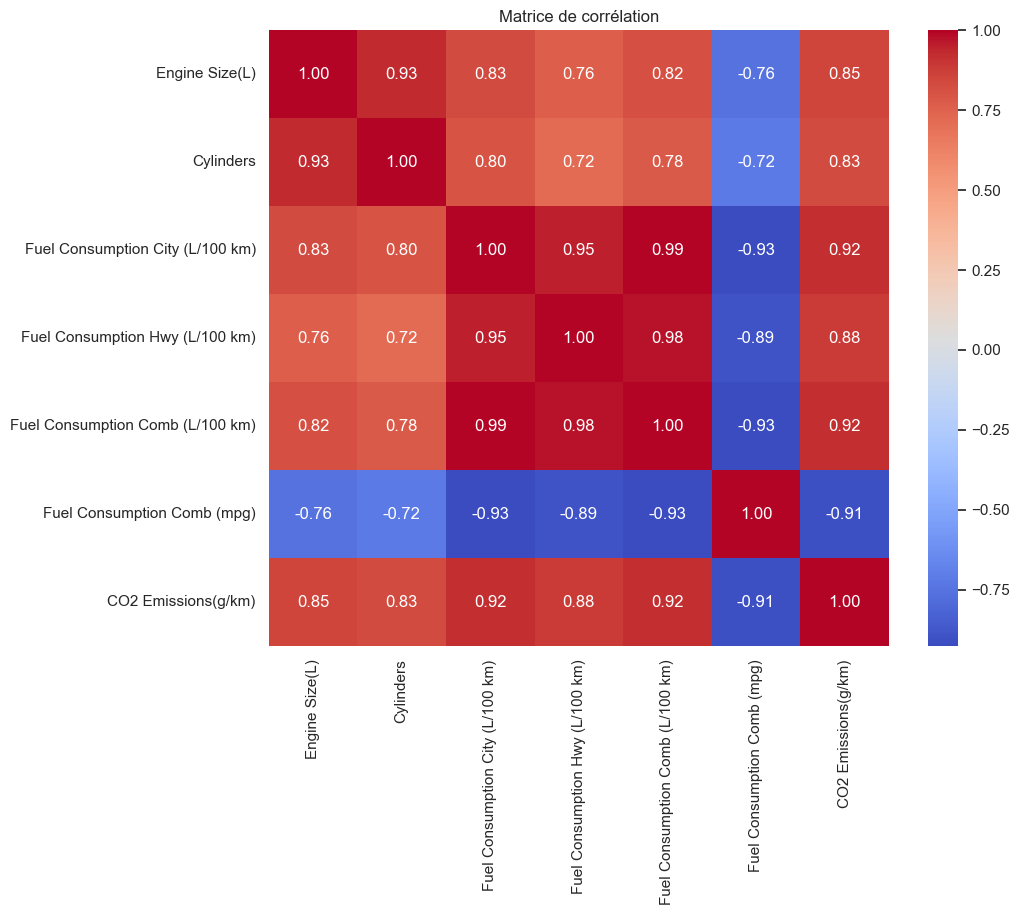

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()